In [7]:
!pip install yfinance mplfinance

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

df = yf.download("BTC-USD", period="6mo", interval="1d")

print(df.shape)
df.head()

/tmp/ipython-input-3332761528.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", period="6mo", interval="1d")
[*********************100%***********************]  1 of 1 completed

(184, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-06-16,106796.757812,108915.375000,104997.625000,105555.593750,50366626945
2025-06-17,104601.117188,107750.195312,103396.531250,106794.117188,55964092176
2025-06-18,104883.328125,105581.851562,103602.265625,104602.070312,47318089133
2025-06-19,104684.289062,105250.890625,103940.773438,104886.773438,37333806920
2025-06-20,103309.601562,106539.382812,102372.210938,104681.031250,50951862476


In [24]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[['Open', 'High', 'Low', 'Close']]

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

df.head(), df.dtypes

(Price                Open           High            Low          Close
 Date                                                                  
 2025-06-16  105555.593750  108915.375000  104997.625000  106796.757812
 2025-06-17  106794.117188  107750.195312  103396.531250  104601.117188
 2025-06-18  104602.070312  105581.851562  103602.265625  104883.328125
 2025-06-19  104886.773438  105250.890625  103940.773438  104684.289062
 2025-06-20  104681.031250  106539.382812  102372.210938  103309.601562,
 Price
 Open     float64
 High     float64
 Low      float64
 Close    float64
 dtype: object)

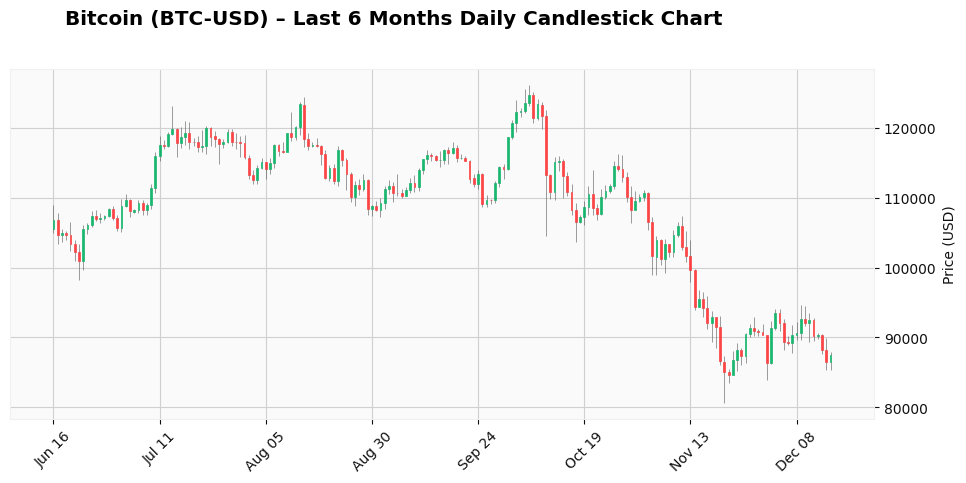

In [27]:
mpf.plot(df, type='candle', style='yahoo', title='Bitcoin (BTC-USD) – Last 6 Months Daily Candlestick Chart', ylabel='Price (USD)', volume=False,
    figsize=(12, 5))

In [28]:
!pip install yfinance plotly


In [32]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = "notebook"

df = yf.download("BTC-USD", period="6mo", interval="1d")

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[['Open', 'High', 'Low', 'Close']]

df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

df.head()

/tmp/ipython-input-2989407335.py:9: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close
Date,,,,
2025-06-16,105555.593750,108915.375000,104997.625000,106796.757812
2025-06-17,106794.117188,107750.195312,103396.531250,104601.117188
2025-06-18,104602.070312,105581.851562,103602.265625,104883.328125
2025-06-19,104886.773438,105250.890625,103940.773438,104684.289062
2025-06-20,104681.031250,106539.382812,102372.210938,103309.601562


In [35]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'],
                                     close=df['Close'], name='BTC-USD')])

fig.update_layout(title="Bitcoin (BTC-USD) – Last 6 Months Daily Candlestick Chart", xaxis_title="Date",
    yaxis_title="Price (USD)", xaxis_rangeslider_visible=True)

fig.show()

Colab is not rendering this device in my cell output.So, I have converted the results into an HTML document which can be downloaded and viewed in the browser with interactive visualisation.  

In [34]:
fig.write_html("btc_interactive.html")

The chart shows the daily price movement of Bitcoin over
the last six months, from around June to early December. Candlesticks are used to represent price action, where green candles show days when the price closed higher and red candles show days when the price closed lower.

#Key Candlestick Patterns Observed

*  In late November, several candlesticks display long lower shadows with smaller candle bodies. These candles suggest that although prices fell during the day, buyers stepped in at lower levels, pushing prices back up before the close. This behavior indicates buying interest near support levels.After these candles appeared, the sharp downward momentum slowed.
*  More recent candles show small bodies with short wicks, resembling indecision-type candles.These candles indicate that neither buyers nor sellers are in clear control, reflecting uncertainty in the market.